<a href="https://colab.research.google.com/github/The-Alchemist-Project/NFT-Spyder/blob/main/shyft_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import requests
import json
import time
import logging
import threading
import numpy as np
import json
import cv2

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from bs4 import BeautifulSoup
import html5lib

In [2]:
class CFG:
    shyft_headers={"x-api-key": "l8ZhRet6Src1lCGb"}
    network="mainnet-beta"
    address=None

EXPLORER_ADDRESS = "https://explorer.solana.com/address/"
EXPLORER_TX = "https://explorer.solana.com/tx/"
SA_MARKET = "https://play.staratlas.com/market/"
selling_df = pd.read_csv("/content/drive/MyDrive/datasets/crawled.csv")

# utils

In [3]:
def get_signatures_for_address(address=CFG.address, limit=10, before=None):
    headers = CFG.shyft_headers

    url = "https://api.shyft.to/sol/v1/wallet/parsed_transaction_history"
    params = {
        "network": CFG.network,
        "account": address,
        "tx_num": limit,
        "before_tx_signature": before
    }

    response = requests.get(url, headers=headers, params=params)
    
    return response.json()


def get_transaction(signature, address=CFG.address):
    headers = CFG.shyft_headers

    url = "https://api.shyft.to/sol/v1/transaction/parsed"
    params = {
        "network": CFG.network,
        "txn_signature": signature
    }

    response = requests.get(url, headers=headers, params=params)

    return response.json()


def get_transaction_history(address=CFG.address, limit=10, before=None, enable_raw="true"):
    headers = CFG.shyft_headers

    url = "https://api.shyft.to/sol/v1/transaction/history"
    params = {
        "network": CFG.network,
        "account": address,
        "tx_num": limit,
        "before_tx_signature": before,
        "enable_raw": enable_raw
    }

    response = requests.get(url, headers=headers, params=params)

    return response.json()


def display_image(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()

# get all items from marketplace

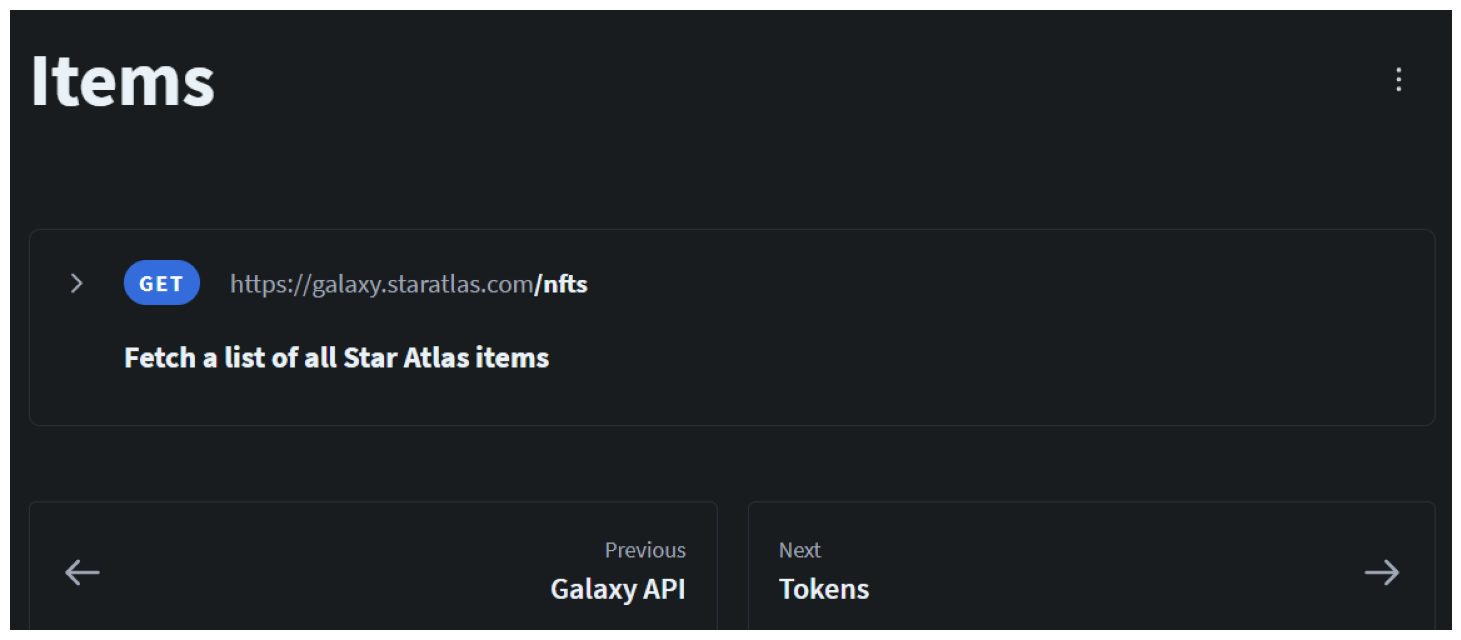

In [57]:
display_image("market_api.png")

In [4]:
# get all item using SA API
name_ls = []
item_type_ls = []
rarity_ls = []
mint_ls = []

item_json = requests.get("https://galaxy.staratlas.com/nfts").json()

for it in item_json:
    name_ls.append(it["name"])
    item_type_ls.append(it["attributes"]["itemType"])
    rarity_ls.append(it["attributes"]["rarity"])
    mint_ls.append(it["mint"])

In [5]:
item_data = {"name": name_ls, "item_type": item_type_ls, "rarity": rarity_ls, "mint_address": mint_ls}
item_df = pd.DataFrame(data=item_data)

In [6]:
item_df

,name,item_type,rarity,mint_address
0,The Assassination of Paizul,collectible,epic,7dr7jVyXf1KUnYq5FTpV2vCZjKRR4MV94jzerb8Fi16Q
1,The Convergence War,collectible,uncommon,36s6AFRXzE9KVdUyoJQ5y6mwxXw21LawYqqwNiQUMD8s
2,The Last Stand,collectible,legendary,Hfjgcs9ix17EwgXVVbKjo6NfMm2CXfr34cwty3xWARUm
3,Om Photoli,collectible,anomaly,DB76aiNQeLzHPwvFhzgwfpe6HGHCDTQ6snW6UD7AnHid
4,Star Atlas,collectible,anomaly,BrzwWsG845VttbTsacZMLKhyc2jAZU12MaPkTYrJHoqm
...,...,...,...,...
193,Core - Episode 6 (Magic Eden),story,common,HfD2TpBfaB4CqvQw3PFEqjTPEMVNdvupzoBPftn8rKUn
194,Core - Episode 6 (Star Atlas),story,common,B9A1Z5ujSfEC1KWgNEQF6MVXKXh3go6apNSRgPmCWqBb
195,Escape Velocity Exterior Paint,structure,uncommon,BaYBQcSVkU8utoK9CFwVBQV9uWEZi64Vd8pfyPKRdVE3
196,Escape Velocity,collectible,uncommon,8yfRmmuzUQqDJJkdwmcBhny1axkCdfDaVxcLPyv2XkTt


# getting txns data

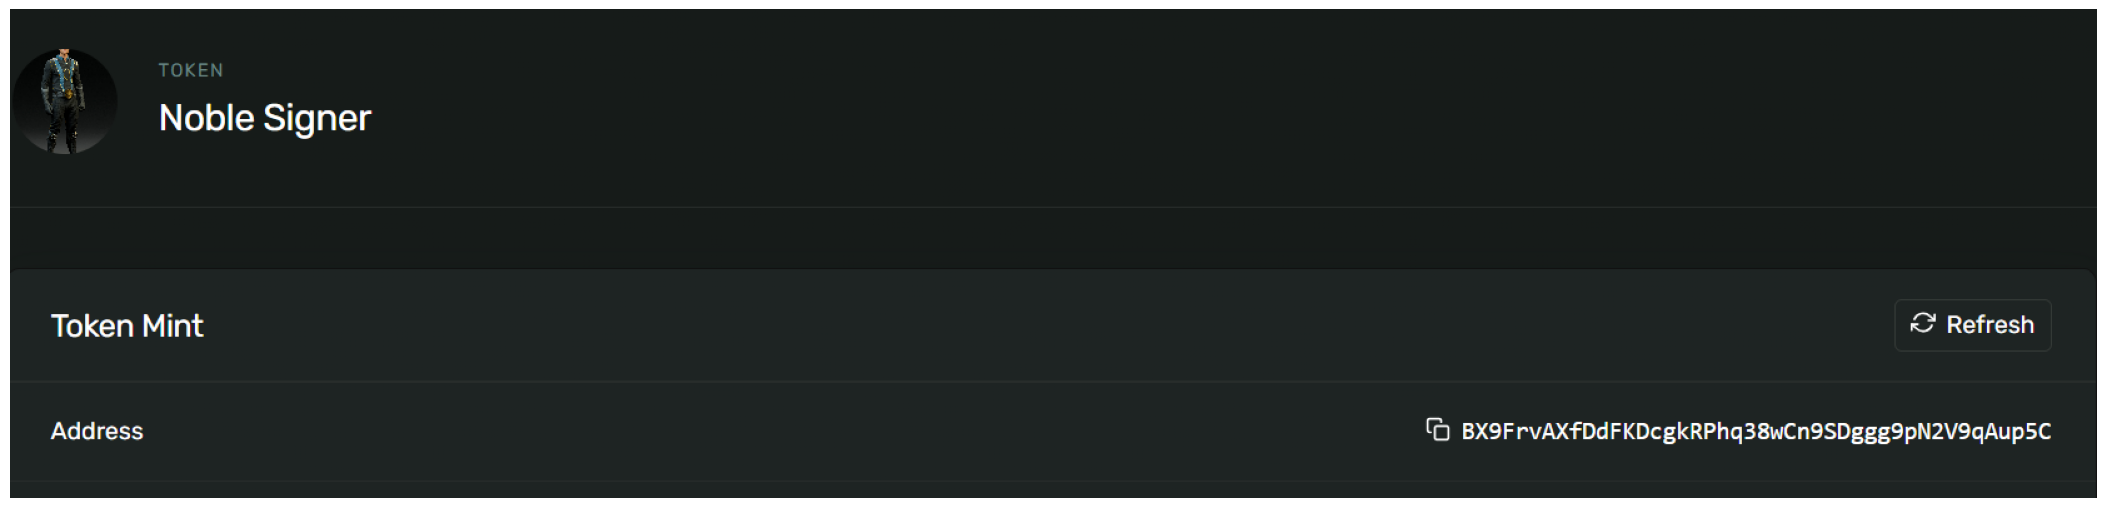

In [54]:
display_image("item.png")

In [52]:
# sample txn response
addr = "BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C" # Noble Signer
sig = "5uZYK7cppoFVVUACfm85FHx2TcBVLqKxbsy5JNqkZG42MvkM4ZmA7D5owyymA5gkXRuzGphuNfzrZc5HCtRoicjM" # sample signature

tx_detail = get_transaction(sig, addr)
tx_detail

{'success': True,
 'message': 'Transaction details fetched successfully',
 'result': {'timestamp': '2023-05-13T22:15:07.000Z',
  'fee': 6.6e-06,
  'fee_payer': '4jaV45hazeXecrs5Xym4RUdyoQiQWV3SBVXsr4VETFfW',
  'signers': ['4jaV45hazeXecrs5Xym4RUdyoQiQWV3SBVXsr4VETFfW'],
  'signatures': ['5uZYK7cppoFVVUACfm85FHx2TcBVLqKxbsy5JNqkZG42MvkM4ZmA7D5owyymA5gkXRuzGphuNfzrZc5HCtRoicjM'],
  'protocol': {'address': 'TokenkegQfeZyiNwAJbNbGKPFXCWuBvf9Ss623VQ5DA',
   'name': 'TOKEN_PROGRAM'},
  'type': 'TOKEN_TRANSFER',
  'status': 'Success',
  'actions': [{'info': {'amount': 1.0806,
     'receiver': 'feesQYAaH3wjGUUQYD959mmi5pY8HSz3F5C3SVc1fp3',
     'sender': 'ErXgQebk7u5hdUSsXYARUUE91sfn2GXnyauGWkSLfu9B',
     'receiver_associated_account': 'XPqzMnL4K8fvtEeyfu4P6xtBsihXH3QbdQnB6kvp6HK',
     'token_address': 'EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v'},
    'source_protocol': {'address': 'TokenkegQfeZyiNwAJbNbGKPFXCWuBvf9Ss623VQ5DA',
     'name': 'TOKEN_PROGRAM'},
    'type': 'TOKEN_TRANSFER',


In [8]:
item = "Noble Signer"
address = item_df.query("name == @item").mint_address.item()

last_signature = None
count = 0
fee_ls = []
price_ls = []
amount_ls = []
txns_address_ls = []

while True:
    print(f"batch-{count}")

    # print(address)
    # print(last_signature)
    txs = get_transaction_history(address=address, before=last_signature)
    if "result" not in txs: continue
    else: txs = txs["result"]
    signatures = [o["signatures"][0] for o in txs]

    for tx, signature in zip(txs, signatures):
        if tx["status"] == "Success":
            types = [a["type"] for a in tx["actions"]]
            
            if tx["type"] == "TOKEN_TRANSFER" and "NFT_TRANSFER" in types:
                print(EXPLORER_TX + signature)

                actions = [t["info"] for t in tx["actions"]]
                fee_ls.append(actions[0]["amount"])
                price_ls.append(actions[1]["amount"])
                amount_ls.append(actions[2]["amount"])
                txns_address_ls.append(EXPLORER_ADDRESS + signature)

    if len(fee_ls) >= 20:
        break
    else:
        count += 1
        last_signature = signatures[-1]

    time.sleep(3)

batch-0
batch-1
https://explorer.solana.com/tx/M1AHh4Xn8FddrJvgPyXX1iWSsLoqngdhuj9KZUhusv3F6K6F2yELLurPEL5XWLt3pu8Z5vSsMkKZnWAuAAqtKWR
https://explorer.solana.com/tx/4f3eQA5W7f5BLJi3rkGbnHXxktKoPaXGfcbv46MW3PWfdJUGATV2p7ryQ4ms2hCjqLvDiFZ8KQjckc1oWusmBFTM
batch-2
https://explorer.solana.com/tx/4cJxHzMbAcFetUwd9r8otYBUyYgGfvErrFwVmd1MNDzx4ZRDm4E4qcYXKPNRvapRav2hY7qinu1qh3MSby9RNLGr
batch-3
batch-4
batch-5
https://explorer.solana.com/tx/2mstMFfLNon4ma6tUUe5kKUYDa1fEd1hiLRBYf2ZxysVNpkDwCyP5WhduNKLJG34vtB1bUKpzCb97genZNonmkQW
batch-6
https://explorer.solana.com/tx/39g9gnJSPVFjHFdAbmNFboamFmFNQ9L6MbMP8dMP9hQDwLyUjGQR7We6wGtqEEK9bEaoMKSXm18X14Ngpsm27Mjn
batch-7
batch-8
batch-9
batch-10
batch-11
batch-12
batch-13
batch-14
batch-15
batch-16
batch-17
batch-18
batch-19
batch-20
batch-21
batch-22
batch-23
batch-24
batch-25
batch-26
batch-27
batch-28
batch-29
batch-30
batch-31
batch-32
batch-33
batch-34
batch-35
batch-36
batch-37
batch-38
batch-39
batch-40
batch-41
batch-42
batch-43
batch-44
batch-

# TXN analysis

In [9]:
signature_ls = [address] * len(fee_ls)

In [10]:
txn_data = {"signature": signature_ls, "price": price_ls, "fee": fee_ls, "amount": amount_ls, "txns_address": txns_address_ls}
tx_df = pd.DataFrame(data=txn_data)
tx_df = tx_df.iloc[::-1].reset_index(drop=True)

In [11]:
# compute total price
tx_df["total_price"] = tx_df.price + tx_df.fee

# compute data for each item
tx_df["value_ea"] = tx_df.total_price / tx_df.amount

In [12]:
tx_df

,signature,price,fee,amount,txns_address,total_price,value_ea
0,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,47.440510,2.549490,1,https://explorer.solana.com/address/f9zKvYcPZn...,49.990000,49.990000
1,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,46.999060,2.999940,1,https://explorer.solana.com/address/2bk45bjDfW...,49.999000,49.999000
2,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,47.000000,3.000000,1,https://explorer.solana.com/address/5g2qfCJ6mz...,50.000000,50.000000
3,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,34.028000,2.172000,1,https://explorer.solana.com/address/39yPYaokmd...,36.200000,36.200000
4,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,54.520000,3.480000,1,https://explorer.solana.com/address/3RYWxYokDb...,58.000000,58.000000
5,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,37.012897,1.989102,1,https://explorer.solana.com/address/3pDpx75xQ2...,39.001999,39.001999
6,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,42.300000,2.700000,1,https://explorer.solana.com/address/nHnQuiaURe...,45.000000,45.000000
7,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,37.609400,2.400600,1,https://explorer.solana.com/address/C1NBu9H2Ge...,40.010000,40.010000
8,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,37.600000,2.400000,1,https://explorer.solana.com/address/4aYbvUjs5A...,40.000000,40.000000
9,BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C,33.849400,2.160600,1,https://explorer.solana.com/address/2ojHTefpk1...,36.010000,36.010000


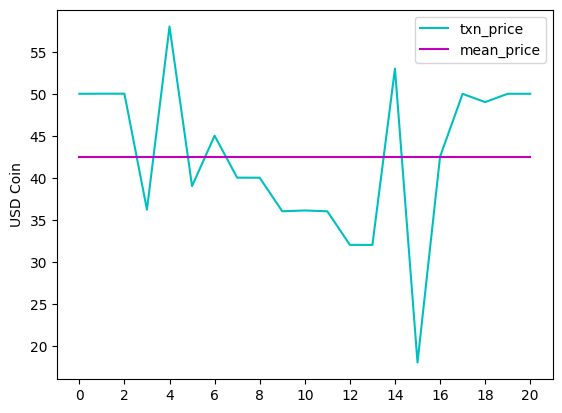

In [35]:
fig, ax = plt.subplots()

ax.plot(tx_df.value_ea, c='c', label="txn_price")
ax.plot([tx_df.value_ea.mean()] * len(fee_ls), c='m', label="mean_price")

ax.set_xticks(np.arange(0, len(fee_ls), 2))
ax.set_ylabel('USD Coin')

ax.legend()

# add simple trending line

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(np.arange(0, len(fee_ls), 1).reshape(-1, 1), tx_df.value_ea)

LinearRegression()

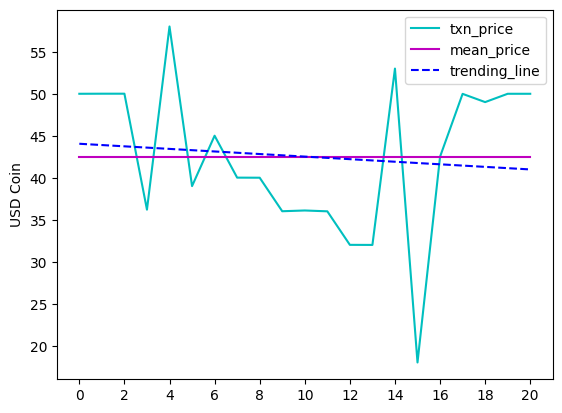

In [34]:
fig, ax = plt.subplots()

ax.plot(tx_df.value_ea, c='c', label="txn_price")
ax.plot([tx_df.value_ea.mean()] * len(fee_ls), c='m', label="mean_price")
ax.plot(lr.predict(np.arange(0, len(fee_ls), 1).reshape(-1, 1)), c='b', linestyle='--', label="trending_line")

ax.set_xticks(np.arange(0, len(fee_ls), 2))
ax.set_ylabel('USD Coin')

ax.legend()

# crawl selling price

In [40]:
print(f"Item: {item}")
print(SA_MARKET + address)

Item: Noble Signer
https://play.staratlas.com/market/BX9FrvAXfDdFKDcgkRPhq38wCn9SDggg9pN2V9qAup5C


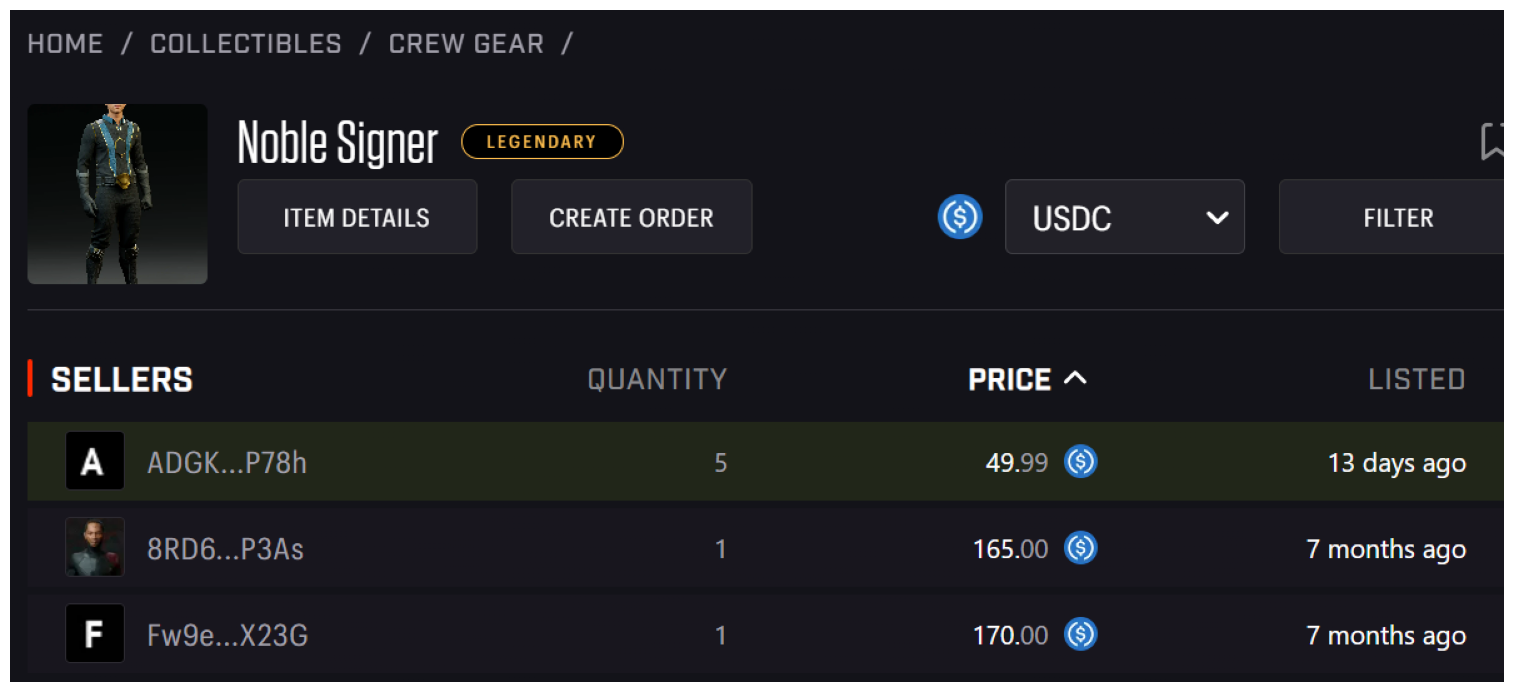

In [56]:
display_image("market_sell.png")

In [18]:
headers = {'User-Agent': 'Mozilla/5.0'}
r = requests.get(SA_MARKET + address, headers=headers)

soup = BeautifulSoup(r.content, 'html5lib')

soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><meta content="2" name="next-head-count"/><link as="style" href="https://play.staratlas.com/_next/static/css/a5a2a3be5b8faaa3.css" rel="preload"/><link data-n-g="" href="https://play.staratlas.com/_next/static/css/a5a2a3be5b8faaa3.css" rel="stylesheet"/><noscript data-n-css=""></noscript><script defer="" nomodule="" src="https://play.staratlas.com/_next/static/chunks/polyfills-5cd94c89d3acac5f.js"></script><script defer="" src="https://play.staratlas.com/_next/static/chunks/webpack-d50dfd59992f0421.js"></script><script defer="" src="https://play.staratlas.com/_next/static/chunks/framework-43062493de41cad2.js"></script><script defer="" src="https://play.staratlas.com/_next/static/chunks/main-fa8ec9dd1a0381cd.js"></script><script defer="" src="https://play.staratlas.com/_next/static/chunks/pages/_app-08c2e49c42235afc.js"></script><script defer="" src="https://play.staratlas.co

In [19]:
selling_df

,sell_address,name,quantity,price
0,ADGKK4Ccmrb9JYocUNUXCHbnWhhuvZAB21YYVBKXP78h,Noble Signer,5,49.99
1,8RD6Rd3NfWBWrYmHJj9cfteWrdsC4MgeBdkEJ8paP3As,Noble Signer,1,165.00
2,Fw9eAFEk4wA78V6GMmphMpVHzaLt3aAokDEv9Q8Vx23G,Noble Signer,1,170.00
3,6MsinmHZzQNPDMevF2DxE8QkDgWaTtdcPjot8a48uWKQ,Noble Signer,1,333.00


In [20]:
# calculate value ea
selling_df["value_ea"] = selling_df.price / selling_df.quantity

# compare to mean txn price
selling_df["higher"] = selling_df.value_ea > tx_df.value_ea.mean() 
selling_df.higher = selling_df.higher.astype("int")

In [21]:
selling_df

,sell_address,name,quantity,price,value_ea,higher
0,ADGKK4Ccmrb9JYocUNUXCHbnWhhuvZAB21YYVBKXP78h,Noble Signer,5,49.99,9.998,0
1,8RD6Rd3NfWBWrYmHJj9cfteWrdsC4MgeBdkEJ8paP3As,Noble Signer,1,165.00,165.000,1
2,Fw9eAFEk4wA78V6GMmphMpVHzaLt3aAokDEv9Q8Vx23G,Noble Signer,1,170.00,170.000,1
3,6MsinmHZzQNPDMevF2DxE8QkDgWaTtdcPjot8a48uWKQ,Noble Signer,1,333.00,333.000,1


In [22]:
colors = np.array(["g", "r"])

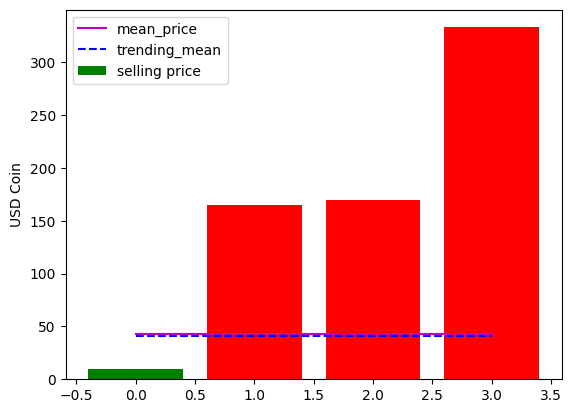

In [36]:
fig, ax = plt.subplots()

ax.bar(np.arange(selling_df.shape[0]), selling_df.value_ea, color=colors[selling_df.higher.values], label="selling price")
ax.plot([tx_df.value_ea.mean()] * selling_df.shape[0], c='m', label="mean_price")
ax.plot([lr.predict(np.array(21).reshape(-1, 1))] * selling_df.shape[0], c='b', linestyle='--', label="trending_mean")

ax.set_ylabel("USD Coin")
ax.legend()

In [37]:
good_buy_df = selling_df.query("higher == 0")
good_buy_df

,sell_address,name,quantity,price,value_ea,higher
0,ADGKK4Ccmrb9JYocUNUXCHbnWhhuvZAB21YYVBKXP78h,Noble Signer,5,49.99,9.998,0
